# SIRS model s vitální dynamikou

*KMA/VPM2*

*Jan Půlpán*


SIR model rozděluje populaci do tří přihrádek (compartments):
- $S$ z anglického Susceptible - náchylný, myšleno k nákaze,
- $I$ jako Infectious - infekční, 
- $R$ jako Removed - odstraněný, myšleno již neinfekční.

Základní SIR model počítá s tím, že již neinfekční jedinec zůstane v přihrádce Removed, nemůže se znovu stát náchylným k nákaze. Některé viry se chovají ale opačně a jedinec imunitu po nějaké době ztrácí. Takový model se nazývá SIRS a počítá s tím, že získaná imunita (přihrádka $R$) není na vždy, ale někteří již neinfekční a odstranění jedinci se znovu stávají náchylnými (přihrádka $S$). 

Jednoduchý SIR model neuvažuje také natalitu $\Lambda$ (počet nově narozených za rok) a mortalitu $\mu$ (podíl zemřelých za rok), protože je epidemie většinou dostatečně rychlá na to, aby dynamika těchto procesů mohla být zanedbána. My oba parametry ale zahrneme do SIRS modelu, mortalitu navíc nastavíme zvlášť pro jednotlivé $S$, $I$ a $R$ přihrádky. Stejně jako v SIR modelu zachováme konstatní velikost populace $N$. Mortalita bude plně kompenzována natalitou, $\Lambda = \mu_1 S + \mu_2 I + \mu_3 R$.

Celkovou velikost populace značíme N, $\beta$ je koeficient tempa růstu nakažených a $\gamma$ je koeficient tempa uzdravení. Následující vývojový diagram popisuje náš SIRS model.

![alt text](SIRS.png "SIRS")

Pomocí diferenciálních rovnic popíšeme SIRS model následovně:

\begin{align*}
\frac{dS}{dt} &= \Lambda - \frac{\beta I S}{N} - \mu_1 S + \nu R,\\
\frac{dI}{dt} &= \frac{\beta I S}{N} - \mu_2 I - \gamma I,\\
\frac{dR}{dt} &= \gamma I - (\mu_3 + \nu) R.\\
\end{align*}

V našem případě, kdy vztah udávající přírůstek infekčních dělíme velikostí populace $N$, udává $\beta$ průměrné množství osobních kontaktů za jednotku času (obvykle jeden den). Koeficient tempa zotavení $\gamma$ pak odpovídá průměrnému počtu dní, kdy je jeden člen populace infekční (značíme $D_I$), platí $\gamma = \frac{1}{D_I}$. 

Oproti základnímu SIR modelu se v SIRS objevuje parametr tempa ztráty imunity $\nu$, který odpovídá průměrnému počtu dní $D_R$, po kterých jedinec ztratí imunitu $\nu = \frac{1}{D_R}$.

I u našeho SIRS modelu platí, že velikost populace $N$ je konstantní. Pokud uvažujeme že mortalita je kompenzována natalitou, pak je z rovnic zřejmé $\frac{dN}{dt} = \frac{dS}{dt}+\frac{dI}{dt}+\frac{dR}{dt}=0$ a tedy $N=S(t)+I(t)+R(t)$.

Protože máme konstatní populaci, natalita kompenzuje mortalitu, a platí tedy $\Lambda - \mu_1S = \mu_2I+\mu_3R$.  Rovnice můžeme upravit do tvaru

\begin{align*}
\frac{dS}{dt} &= - \frac{\beta I S}{N} + \mu_2 I + (\mu_3 +\nu) R,\\
\frac{dI}{dt} &= \frac{\beta I S}{N} - (\mu_2 + \gamma) I,\\
\frac{dR}{dt} &= \gamma I - (\mu_3 + \nu) R.\\
\end{align*}

Protože platí $N=S(t)+I(t)+R(t)=$ konst. můžeme redukovat počet rovnic a dostaneme soustavu 2 rovnic

\begin{align*}
\frac{dS}{dt} &= - \frac{\beta I S}{N} + \mu_2 I + (\mu_3 +\nu) (N-S-I),\\
\frac{dI}{dt} &= \frac{\beta I S}{N} - (\mu_2 + \gamma) I.\\
\end{align*}

Pokud budeme počítat s prevalencí, kterou označíme opět $S := \frac{S}{N}$, respektive $I := \frac{I}{N}$, rovnice se dále zjednoduší. Do rovnic tedy dosadíme $S=NS$, $I = NI$ a $\frac{dS}{dt} = N\frac{dS}{dt}$, $\frac{dI}{dt} = N\frac{dI}{dt}$. Po vydělení $N$ dostaneme

\begin{align*}
\frac{dS}{dt} &= - \beta I S + (\mu_2-\mu_3-\nu) I - (\mu_3 +\nu) S +\mu_3 + \nu,\\
\frac{dI}{dt} &= \beta I S - (\mu_2 + \gamma) I.\\
\end{align*}

Ani počet náchylných, ani počet infekčních nemůže být záporný. Zároveň, pokud uvažujeme v prevalencích, pak součet náchylných a infekčních je menší nebo roven jedné. Oblast na které má smysl uvedenou soustavu řešit, a tedy definiční obor soustavy, je dána trojúhelníkem $\Omega = \{(S,I): S \geq 0; I \geq 0; S+I\leq 1\}$. 

Jestli vypukne epidemie, která se mezi populací šíří, záleží na tom, zda bude přibývat infekčních jedinců, tedy $\frac{dI}{dt} > 0$. Můžeme psát $\beta I S - (\mu_2 + \gamma) I > 0$ a po úpravách $\frac{\beta}{\mu_2+\gamma} > 1$. Levou stranu výrazu nazýváme základní reprodukční číslo a značíme
$$ R_0 = \frac{\beta}{\mu_2+\gamma}.$$

Reprodukční číslo $R_0 > 1$ pak znamená, že se nákaza bude šířit.

Pokud budeme vycházet z redukovaných rovnic, má SIRS model dvě různá stacionární řešení. Jejich existence je závislá na velikosti $R_0$. Stejně jako u SIR modelu existuje stacionární bod $(1, 0)$ a pomocí Ljapunovovy metody lze ukázat, že tento stacionární bod je asymptoticky stabilní pokud $R_0 \leq 1$ a nestabilní pokud $R_0 > 1$. Tento stacionární bod se někdy také anglicky nazývá disease free equilibrium (DFE). Druhý stacionární bod $(\hat{S},\hat{I})$, anglicky nazývaný endemic equilibrium vzniká v rámci definičního oboru ve chvíli, kdy $R_0 > 1$ a je asymptoticky stabilní na definičním oboru mínus osa $x$. Za předpokladu, že tempo ztráty imunity $\nu>0$, navíc platí
\begin{align*}
\hat{S}&=\frac{\mu_2+\gamma}{\beta}=\frac{1}{R_0},\\
\hat{I}&=\frac{\mu_3+\nu}{\mu_3+\gamma+\nu}\left( 1- \frac{1}{R_0} \right).\\
\end{align*}


In [1]:
%matplotlib inline
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from sympy.core.symbol import symbols
from sympy.solvers.solveset import nonlinsolve
import ipywidgets as widgets
from IPython.display import Markdown, display, clear_output

plt.style.use("ggplot")
plt.rcParams.update({'font.size': 16})

N = 1000        # velikost populace
R0 = 0          # počáteční podmínka pro R
I0 = 10         # počáteční podmínka pro I
S0 = N-I0-R0    # počáteční podmínka pro S
max_time = 500  # maximální čas, pro který model počítat

# definice modelu
def sirs_ode(t,ivs,params):
    beta, gamma, mu2, mu3, nu = params
    S,I,R = ivs
    N = S+I+R

    dS = -beta*S*I/N + mu2*I + (mu3+nu)*R
    dI = beta*S*I/N-(mu2+gamma)*I
    dR = gamma*I-(mu3+nu)*R

    return [dS,dI,dR]

# řešení a vykreslení
def sirs_solve(beta, gamma, mu_2, mu_3, nu):
    
    params = [beta, gamma, mu_2, mu_3, nu]
    
    display(Markdown(r'$R_O$ = '+'{:.2f}'.format(beta/(mu_2+gamma))))
    display(Markdown(r'$D_I$ = '+'{:.2f}'.format(1/gamma)))
    display(Markdown(r'$D_R$ = '+'{:.2f}'.format(1/nu)))
    
    global fig,ax1,ax2,ax3
    
    fig = plt.figure(figsize=(32,12))
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(223)
    ax3 = fig.add_subplot(122)

    # stacionarni body
    Ss, Is = symbols('Ss, Is', real=True)
    stable = nonlinsolve([-beta*Ss*Is + (mu_2-mu_3-nu)*Is - (mu_3+nu)*Ss + mu_3+nu,
                          beta*Ss*Is - (mu_2+gamma)*Is], [Ss, Is])
    for i in range(len(stable.args)):
        display(Markdown('Stacionární bod '+str(i+1)+\
                         ': $({:.3f},{:.3f})$'.format(stable.args[i][0],float(stable.args[i][1]))))

      
    # vykresleni vektoroveho pole
    Sv, Iv = np.meshgrid(np.linspace(-.1, 1.1, 20), np.linspace(-.1, 1.1, 20))
    u, v = np.zeros(Sv.shape), np.zeros(Iv.shape)
    m, n = Sv.shape
    t = 0
    for i in range(m):
        for j in range(n):
            Rv = 1 - Sv[i, j] - Iv[i, j]
            u[i,j], v[i,j], _ = sirs_ode(t, [Sv[i, j], Iv[i, j], Rv], params)#

    ax3.quiver(Sv, Iv, u, v, color='lightgray')

    # vykresleni klidovych stavu a fazoveho portretu
    for s in range(len(stable.args)):
            for r in np.linspace(.05,1.2,10):
                for phi in np.linspace(0, 2*np.pi, int(np.random.rand()*10+6)):
                    s0 = r*np.cos(phi)+stable.args[s][0]
                    i0 = r*np.sin(phi)+stable.args[s][1]
                    r0 = 1-s0-i0
                    ivs = [s0, i0, r0]
                    
                    sol = solve_ivp(fun=lambda t, y: sirs_ode(t, y, params),
                                    t_span=[0,250],
                                    y0=ivs, 
                                    t_eval=np.linspace(0,250,1000))
                    ax3.plot(sol.y[0], sol.y[1], 'k-')
                    ax3.plot([sol.y[0][0]], [sol.y[1][0]], 'ko')


    for s in range(len(stable.args)):
        if stable.args[s][0].is_real and stable.args[s][1].is_real:
            ax3.plot(stable.args[s][0], stable.args[s][1], marker=".", color='red', markersize=30)
    
    # vykesleni definicniho oboru
    ax3.add_artist(Polygon(((0.,0.), (1.,0.), (0., 1.)),fc=(0,0,1,0.18)))
    
    ax3.set_xlim([-.03, 1.03])
    ax3.set_ylim([-.03, 1.03])
    ax3.set_xlabel('$S$')
    ax3.set_ylabel('$I$')
    
    # vykresleni reseni SIRS
    ivs = [S0,I0,R0]
    time = np.linspace(0,max_time,801)

    sirs_sol = solve_ivp(fun=lambda t, y: sirs_ode(t, y, params), 
                         t_span=[min(time),max(time)], 
                         y0=ivs, 
                         t_eval=time)

    t_sol = sirs_sol['t']
    s_sol, i_sol, r_sol = sirs_sol['y']


    splot = ax1.plot(t_sol, s_sol, color='blue', linewidth=2, label='S')
    iplot = ax1.plot(t_sol, i_sol, color='red', linewidth=2, label='I')
    rplot = ax1.plot(t_sol, r_sol, color='green', linewidth=2, label='R')
    
    ax2.set_xlabel("t")
    legend = ax1.legend(loc=5,bbox_to_anchor=(1.1,0.5))
    frame = legend.get_frame()
    frame.set_facecolor("white")

    pal = ["#AA0000", "#00AA00", "#0000AA"]
    ax2.stackplot(t_sol, i_sol, r_sol, s_sol, colors=pal, alpha=0.5)
    plt.show()
    
interactive_plot = widgets.interactive(sirs_solve, 
                               beta = widgets.FloatSlider(min=0, max=1, step=.05, value=0.1), 
                               gamma = widgets.FloatSlider(min=.01, max=.3, step=.01, value=0.05),
                               mu_2 = widgets.FloatSlider(min=0, max=.02, step=.005, value=0.01, readout_format='.3f'),
                               mu_3 = widgets.FloatSlider(min=0, max=0.01, step=0.002, value=0.01, readout_format='.3f'),
                               nu = widgets.FloatLogSlider(min=-3, 
                                                           max=.1, 
                                                           base=10, 
                                                           step=.02, 
                                                           value=0.01, 
                                                           description='nu'))
interactive_plot

interactive(children=(FloatSlider(value=0.1, description='beta', max=1.0, step=0.05), FloatSlider(value=0.05, …

$R_O$ = 1.67

$D_I$ = 20.00

$D_R$ = 100.00

Stacionární bod 1: $(0.600,0.114)$

Stacionární bod 2: $(1.000,0.000)$

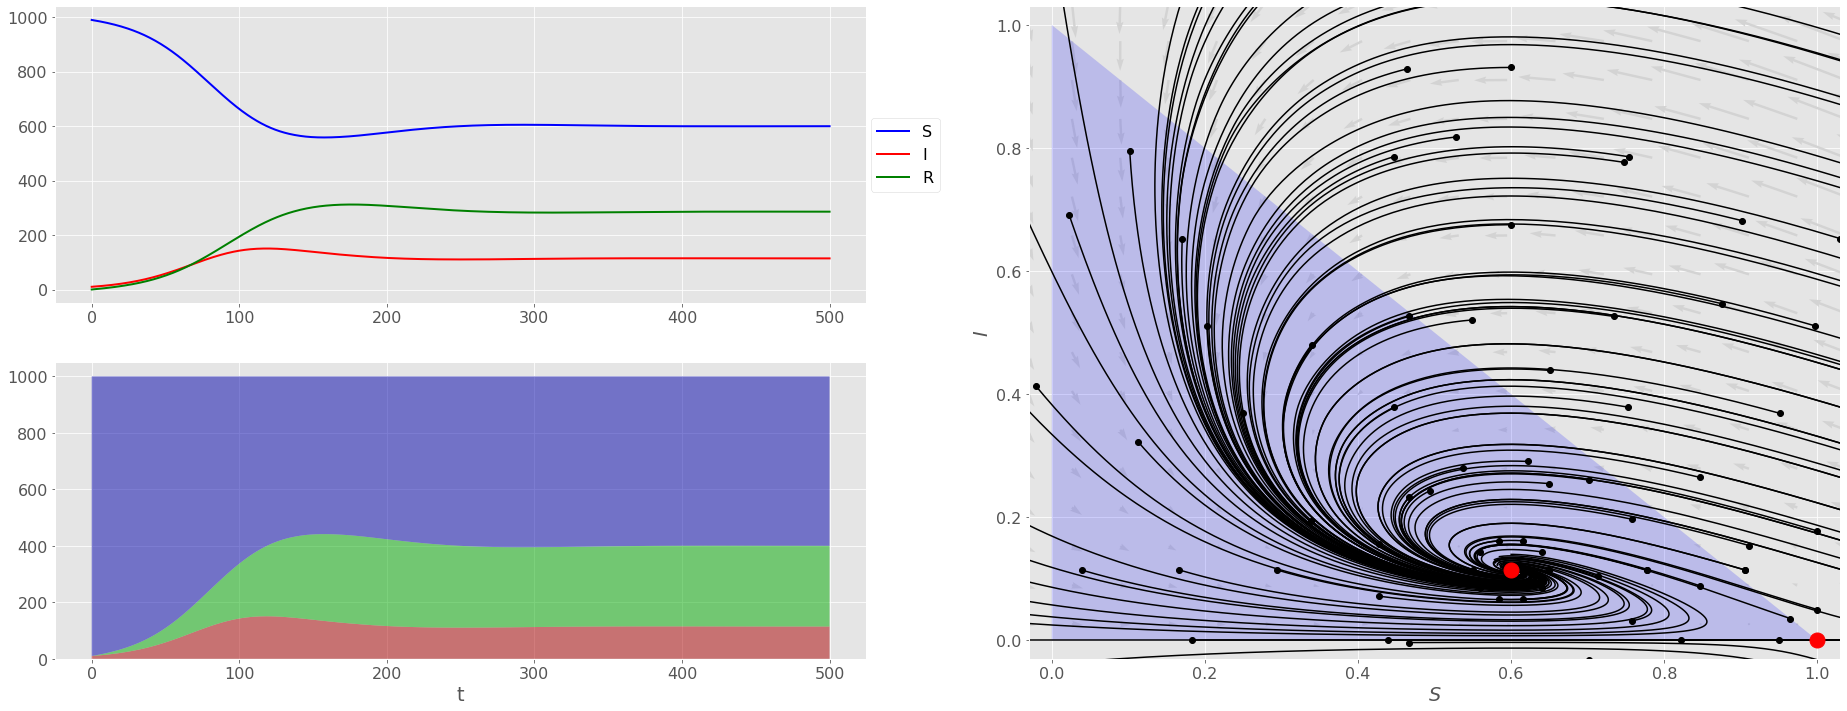

In [2]:
sirs_solve(.1,.05,.01,.01,.01)

Zdroje:

[1] Luděk Berec. Když se matematika potká s biologií: matematická epidemiologie. Pokroky matematiky, fyziky a astronomie, ročník 63 (2018), č. 2

[2] Philippe Adda, Derdei Bichara. Global stability for SIR and SIRS models with differential mortality.International Journal of Pure and Applied Mathematics, Academic Publishing Ltd, 2012, GLOBALSTABILITY FOR SIR AND SIRS MODELS WITH DIFFERENTIAL MORTALITY, 80 (3), pp.425-433. hal-00675359v2

[3] Wikipedia contributors. (2020, November 16). Compartmental models in epidemiology. In Wikipedia, The Free Encyclopedia. Retrieved 12:02, November 17, 2020, from https://en.wikipedia.org/w/index.php?title=Compartmental_models_in_epidemiology&oldid=989062674